In [74]:
import cmath
import matplotlib
import sympy as sp
from sympy import *
import numpy as np
import pandas as pd

init_printing()

In [75]:
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}
W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

In [76]:
def modified_link_matrix(web, pagelist, d=0.85, print_matrix=True):
    N = len(pagelist)
    A = np.zeros((N, N))

    page_index = {page: i for i, page in enumerate(pagelist)}

    for j, page_j in enumerate(pagelist):
        outlinks = web.get(page_j, [])
        if not outlinks:
            A[:, j] = 1 / N 
        else:
            valid_links = [link for link in outlinks if link in page_index]
            L = len(valid_links)
            if L > 0:
                for linked_page in valid_links:
                    i = page_index[linked_page]
                    A[i, j] = 1 / L
            else:
                A[:, j] = 1 / N 

    E = np.ones((N, N))
    M = d * A + (1 - d) * E / N

    if print_matrix:
        df = pd.DataFrame(M, index=pagelist, columns=pagelist)
        print("\nModified Link Matrix (d = {:.2f}):\n".format(d))
        print(np.round(df, 3))
        print("\nSøjlesummer:\n", df.sum()) 

    return M

## Opgave 26

Beregn produktet af følgende Markov matricer. Verificer at den resulterende matrix ligeledes er en Markov matrix?
$$A = Matrix([[0.2,0.5,0.3],[0.4,0.4,0.2],[0.1,0.7,0.2]])$$
$$B = Matrix([[0.5,0.3,0.2],[0.2,0.5,0.3],[0.3,0.2,0.5]])$$

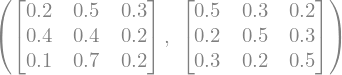

In [77]:
A = Matrix([[0.2,0.5,0.3],[0.4,0.4,0.2],[0.1,0.7,0.2]])
B = Matrix([[0.5,0.3,0.2],[0.2,0.5,0.3],[0.3,0.2,0.5]])
A, B

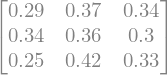

In [78]:
A*B

In [79]:
0.29+0.37+0.34

In [80]:
0.34+0.36+0.3

In [81]:
0.25+0.42+0.33

## Opgave 27

Vis at produktet af to Markov matricer er en Markov matrix.

Grunden til at produktet af to markov matricer altid vil give en markov matrix skyldes blandt andet at alle tal i en markov matrix er positive, hvilket vil sige at produktet også kun vil få positive værdier, og den anden grund er at summen af rækkerne i en markov matrix altid skal give en, for at det er en markov matrix, derfor når man ganger dem sammen, giver summen af to markov matricer en matrix, hvor rækkernes sum bliver 1

$$ C_{ij} = ∑A_{ik} * B_{kj} >= 0 $$

$$ ∑C_{ij} = ∑∑A_{ik} * B_{kj} $$

$$ = ∑A_{ik} * ∑B_{kj} $$

$$ ∑B_{kj} = 1 $$

$$ ∑C_{ij} = ∑A_{ik}*1 = ∑A_{ik} = 1 $$

## Opgave 28

Konkludér at hvis A er en Markov matrix, så er $A^k$ også en Markov matrix for alle  k er en mængde af N
.

$A^k$ er A gange A gange A... k gange

Som tideligere nævnt vil produktet af to markov matricer ganget sammen blive en markov matrix, det betyder at man ganger uendeligt mange markov matricer sammen, og det vil altid give en markov matrix.

## Opgave 29

Lad A være en nxn Markov matrix. Vis at $rad_A = 1$
.

Informeret i opgaven er:  ingen egenværdier af en markov matrix har absolutværdi større end 1. Hvilket vil sige at den spektrale radius $rad_A$ af en Markov matrix A er lig 1

Note: den spektrale radius er den største absolutte værdi af alle egenværdierne til en matrix (taget fra chatGPT)

Hint: Antag at A har en egenværdi lambda med den absolutte værdi af lambda større end 1. Lad v være den tilhørende egenvektor. For en Markov matrix er summen af hver række netop 1, altså kan Av = lambda*v ses som n (forskellige) vægtede gennemsnit af v1, v2,...,vn. Hvor stor kan absolutværdien af et vægtet gennemsnit af n elementer maksimalt være?

Egenværdiproblemet

Vi benytter egenværdiproblemet: 

A*v = λ * v

Vi kalder max v for v_k

Herfra kan vi se at max(A*v_k) <= v_k, fordi at når man finder produktet af en matrix og vektor giver det en vektor og vi har defineret max af vektorens værdier til at være v_k. Så kan vi se: (A*v)_k <= v_k. 

Det kan indsættes i egenværdi problemet nu: 

| (A * v)_k | = | λ * v_k | = | λ | * | v_k | <= | v_k |

Her kan vi se at egenværdiern højest skal være 1 for at venstresiden aldrig bliver højere end v_k. 

## Opgave 30

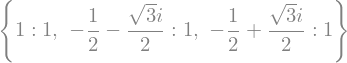

In [82]:
A = Matrix([[0,1,0],[0,0,1],[1,0,0]])
A.eigenvals() # egenværdierne findes

Modulus af egenværdierne findes ved at tage den absolutte værdi af værdien.

In [83]:
print(abs(1))
print(abs((-1/2)-(sqrt(3)*I/2)))
print(abs((-1/2)+(sqrt(3)*I/2)))

1
1.00000000000000
1.00000000000000


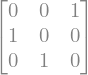

In [84]:
A*A

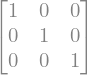

In [85]:
A*A*A

Nu forsøger vi at se på de næste $A^k$, for at se hvordan det udvikler sig, sagt på anden vis, om der er et mynster:

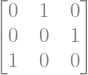

In [86]:
A*A*A*A

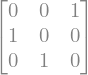

In [87]:
A**5

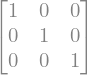

In [88]:
A**6

Heraf kan vi se at den ikke konvagerer, da mynsteret går i ring, den er der i mod divergent

## Opgave 31

## Opgave 32

Til at dæmpe matricen med en faktor 0.85 benyttes formlen: $$ M = dæmpningsfaktoren * L + (1-dæmpningsfaktoren) * (1/n) * E$$

In [89]:
E = Matrix([[1,1,1],[1,1,1],[1,1,1]])

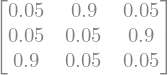

In [90]:
M = 0.85*A+(1-0.85)*1/3*E
M

Dermed er $A_d$ lig med:

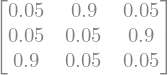

In [91]:
A_d = M
A_d

In [92]:
A_d.eigenvals() # egenværdierne findes

In [93]:
print(abs(-0.425 - 0.736121593216773*I))
print(abs(-0.425 + 0.736121593216773*I))
print(abs(1.0+5.1434798388906*10 **-66*I)) # modulus findes

0.850000000000000
0.850000000000000
1.00000000000000


Vi kan se at en af eigenværdiernes modulus er 1, hvilket stemmer overens med at det er en markov matrix, da vi som tideligere nævnt kom frem til at en markov matrix altid har en egenværdi med modulus 1.

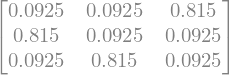

In [94]:
A_d**2 # Vi tjekker om den konvergerer

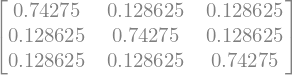

In [95]:
A_d**3

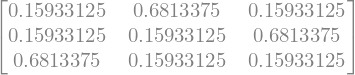

In [96]:
A_d**4

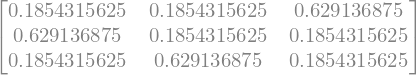

In [97]:
A_d**5

Ja $A_d$ konvergerer for k -> uendelig, da matricens mynster ikke går i ring

## Opgave 33

Forklar hvorfor Sætning 1 er relevant for PageRank algoritmen.

(Den første del af sætningen siger at n i en markov matrix med strengt positive elementer skal være over 2, hvilket betyder at matricen skal være mindst en 2 x 2 matrice. Den næste del siger at der skal være en entydig vektor (kun en vektor) og at $A^T$ * x = x, hvilket betyder at egenværdierne skal være 1, når alle elementer x er positive og summerer til 1.)

Til sidst i sætningen står der $$lim(A^T)^k = x*e^t = [x, x, x,..., x]$$ i den første del er $A^T$= L, hvilket skal benyttes til PageRank algoritmen, og her tages lim af linkmatricen i k, altså ganget med sig selv k gange. Den næste del af ligningen indeholder x, hvilket er en egenvektor og e^t, hvilket vi fra opgave 31, ved er en enhedsvektor bestående af 1'taller. Den sidste del af ligningen viser udfaldet af det hele, og siger at det bliver til en transponeret vektor indholdene x, som ifølge chatGPT er PageRank-vektoren. (Tror det hænger sammen på den måde)

Det er relevant for PageRank algoritmen, da en del af definitionen på en linkmatrice er at søjlerne hver især har en sum på 1, hvilket betyder at linkmatricen transponeret er en markov matrix... (Er ikke sikker på at det er rigtigt)

## Opgave 34

Hænger meget sammen med opgave 33

e = enhedsvektor = [1,1,1,...,1], derfor er:

$$ x*e^t = x* [1,1,1,...,1]^t = x*[1,1,1,...,1] = [x,x,x,...,x] $$

# Opgave 35

In [101]:
def matrix_PageRank(web, power, d=0.85):

    ranking = dict()

    pagelist = list(web.keys())

    M = modified_link_matrix(web, pagelist, d)

    temp = np.ones(len(pagelist)) / len(pagelist)

    for _ in range (power):
        temp = M @ temp

    for i in range(len(pagelist)):
        ranking[pagelist[i]] = float(round(temp[i], 6))
        
    return ranking

print("matrix page rank:", matrix_PageRank(W1,50))


Modified Link Matrix (d = 0.85):

       P1    P2    P3    P4   P5
P1  0.030  0.03  0.88  0.03  0.2
P2  0.455  0.03  0.03  0.03  0.2
P3  0.455  0.88  0.03  0.03  0.2
P4  0.030  0.03  0.03  0.03  0.2
P5  0.030  0.03  0.03  0.88  0.2

Søjlesummer:
 P1    1.0
P2    1.0
P3    1.0
P4    1.0
P5    1.0
dtype: float64
matrix page rank: {'P1': 0.339422, 'P2': 0.188018, 'P3': 0.347833, 'P4': 0.043764, 'P5': 0.080963}
